# SVD 2
Es posible implementar el codigo anterior dentro de una función, pero ya que entendemos como funciona y fuimos capaces de programarlo, la tarea de construirlo seria algo que no nos entregara muchas habilidades en comparacion al tiempo que le entregaremos.

Entiendasé que si pasamos programando codigo a mano, nos volveremos buenos en justo eso, en crear librerias y no por otro lado en acostumbrarse a utilizarlas.

A un doctor no se le pide saber manofacturar sus intrsumentos pues debe concentrarse en otras tareas, pero entendiendo sus intrumentos y los principios que lleva.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

C = np.array([ [3,2,2], [2,3,-2] ])

n_row, n_col = C.shape

U, sigma, VT = sp.linalg.svd(C)

V = VT.T

In [3]:
#esta definicion de sigma dara un error pues las dimensiones no permiten multiplicar, intentalo
Sigma = np.diag(sigma)

U @ Sigma @ VT

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [4]:
# en cambio la crearemos así, Sigma tendra el tamaño de la matriz original
Sigma = np.zeros((n_row, n_col))
for i in range(min(n_row, n_col)):
    Sigma[i, i] = sigma[i]

Sigma

array([[5., 0., 0.],
       [0., 3., 0.]])

In [5]:
print("U \n", U)
print("Sigma \n", Sigma)
print("VT \n", VT)
print("Reconstruccion:")

U @ Sigma @ VT

U 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Sigma 
 [[5. 0. 0.]
 [0. 3. 0.]]
VT 
 [[ 7.07106781e-01  7.07106781e-01  3.67439059e-16]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]
Reconstruccion:


array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

Para ahorrar trabajo es posible directamente indicar que no necesitamos las matrices completas.

In [6]:
C = np.array([ [3,2,2], [2,3,-2] ])

U, sigma, VT = sp.linalg.svd(C, full_matrices= False)
V = VT.T
Sigma = np.diag(sigma)

U @ Sigma @ VT

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

## Aplicación a Imagenes

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()

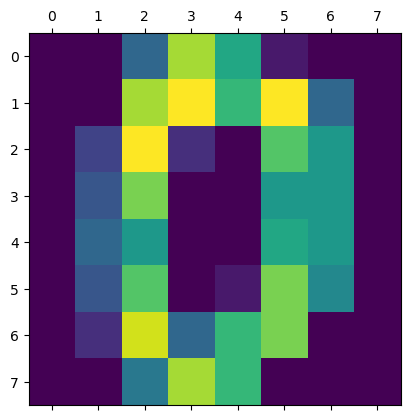

In [8]:
plt.matshow(digits.images[0])

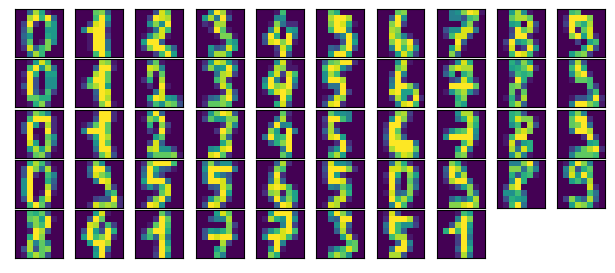

In [9]:
# visualisation of faces dataset
fig = plt.figure(figsize=(6, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(48):
    ax = fig.add_subplot(8, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], interpolation='nearest')

In [11]:
M = digits.images

M.shape # son 1797 datos, cada dato es 8x8, queremos estirarloa  un vector

(1797, 8, 8)

In [12]:
Mr = M.reshape(1797, -1)

Mr.shape # cada fila contiene los 8x8 pixeles para la imagen de un digito

(1797, 64)

In [15]:
U, Sigma, VT = sp.linalg.svd(Mr)

- $U$ las columnas de U contienen la información de como evolucionan las columnas de la matrix, como se relacionan (si fueran pixeles que evolucionan y cada fila una medición entonces nos importaria)
- $\Sigma$ es la energia de cada valor, cuales son mas y menos importantes
- $V^T$ contiene el significado de cada fila, osea si tomamos cada fila de V, tendriamos una imagen de un numero o como se almacenan estas imagenes

In [69]:
U.shape # las columas

(1797, 1797)

In [71]:
VT.shape # las filas

(64, 64)

In [76]:
Vreshaped = VT.reshape(64, 8 , 8)

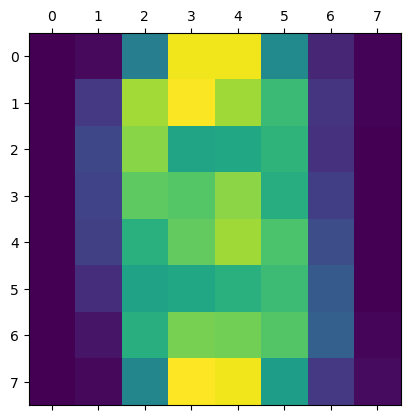

In [77]:
# esto es lo que el algoritmo nos entrega como lo más importante 
# para crear los numeros del dataset
plt.matshow(Vreshaped[0])

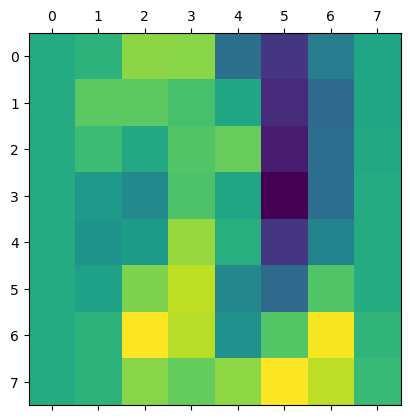

In [84]:
# esto es lo que el algoritmo nos entrega como lo más importante 
# para crear los numeros del dataset
plt.matshow(Vreshaped[3]) # vemos rastros de lo que parecen digitos

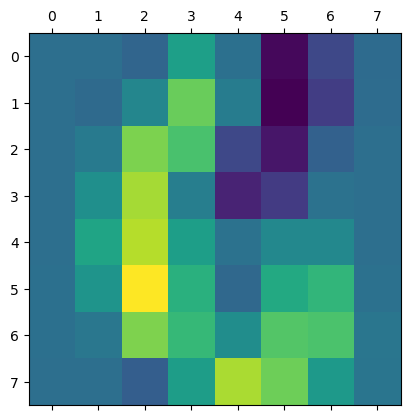

In [120]:
# Ahora tengamos en cuenta la cantidad de energia de cada vector, cuales son mas importantes
plt.matshow(
      Vreshaped[0]
    + Vreshaped[1]
    + Vreshaped[2]
    + Vreshaped[3]
    )

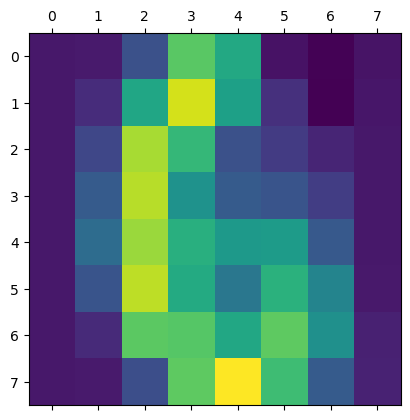

In [119]:
# Ahora tengamos en cuenta la cantidad de energia de cada vector, cuales son mas importantes
plt.matshow(
      Sigma[0] * Vreshaped[0]
    + Sigma[1] * Vreshaped[1]
    + Sigma[2] * Vreshaped[2]
    + Sigma[3] * Vreshaped[3]
    )

## Ejemplo con rostros

In [17]:
from sklearn.datasets import fetch_olivetti_faces
# fetch the faces data
faces = fetch_olivetti_faces()

faces.images.shape

(400, 64, 64)

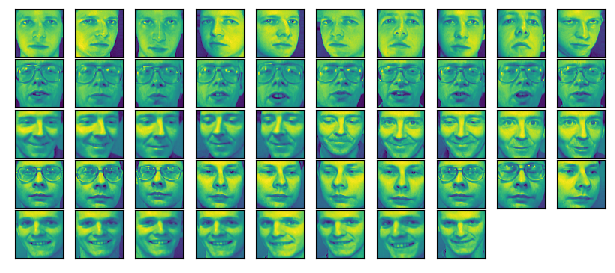

In [18]:
# visualisation of faces dataset
fig = plt.figure(figsize=(6, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(48):
    ax = fig.add_subplot(8, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], interpolation='nearest')

In [19]:
M_faces = faces.images.reshape(400, -1) # mantiene las filas y estira las demas

M_faces.shape

(400, 4096)

In [20]:
U_f, Sigma_f, VT_f = sp.linalg.svd(M_faces)

In [21]:
VT_f.shape

(4096, 4096)

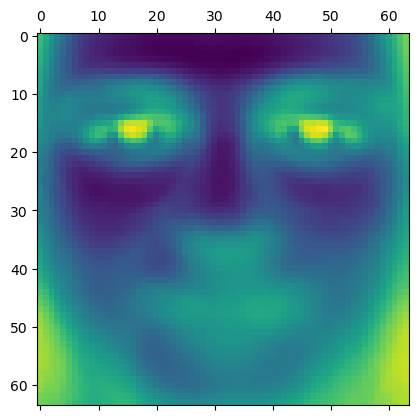

In [22]:
Vreshaped_f = VT_f.reshape(4096, 64, 64)

#Tenemos asi el vector base de cara más representativo para nuestros datos
plt.matshow( Vreshaped_f[0])

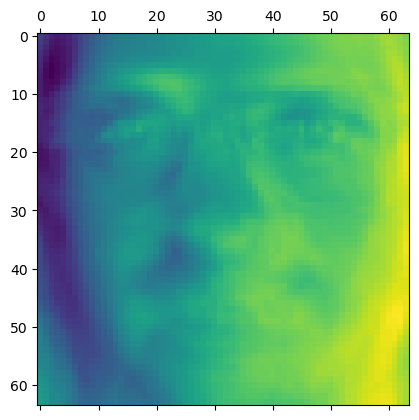

In [23]:
plt.matshow( Vreshaped_f[1])

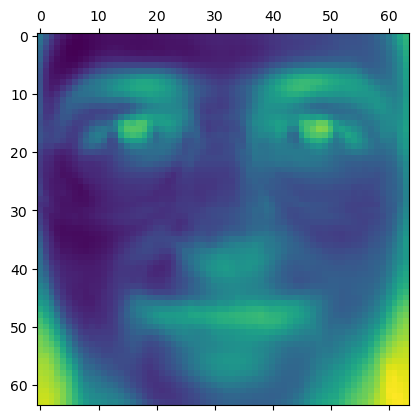

In [24]:
plt.matshow(
      Sigma_f[0]* Vreshaped_f[0] 
    + Sigma_f[1]*Vreshaped_f[1] 
    + Sigma_f[2]*Vreshaped_f[2]
    + Sigma_f[3]*Vreshaped_f[3]
    + Sigma_f[4]*Vreshaped_f[4]
    + Sigma_f[5]*Vreshaped_f[5]
    )